# Ames Housing Project

## Table of Contents
- [Preliminary Data Cleaning](##Preliminary-Data-Cleaning)
- [Data Dictionary](#Data_Dictionary)
- [Data and Null Values Exploration and Cleaning](###Data-and-Null-Values-Exploration-and-Cleaning )
- [Categorical Feature Exploration](###Categorical-Feature-Exploration)
- [Neighborhood vs Sale Price](###Neighborhood-vs-Sale-Price) 
- [Outliers](#Outliers)
- [Feature Engineering](#FeatureEngineering)
- [Feature Selection](#Feature-Selection) 
- [Model Prep: Train - Test Split and Scaling](#Model-Prep:-Train---Test-Split-and-Scaling)
- [Selecting and Fitting our Model](#Selecting-and-Fitting-our-Model)
- [Accuracy of Training Predictions](#Accuracy-of-Training-Predictions)
- [Residuals Analysis](#Residuals-Analysis)
- [Predictions on Test Data Set](###Predictions-on-Test-Data-Set)
- [Dropped Features in Test Data Set](#Dropped-Features-in-Test-Data-Set) 
- [Feature Engineering Test Data Set](#Feature-Engineering-Test-Data-Set)
- [Feature Interactions with the Test Data Set](#Feature-Interactions-with-the-Test-Data-Set)
- [Test Data Feature Selection](#Test-Data-Feature-Selection)
- [Running the Models](#Running-the-Models)
- [Making and Exploring Predictions](##Making-and-Exploring-Predictions)


## Data Dictionary 
A complete data dictionary is available [here](https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge/data).

Find below the libraries which were used in this project. 

In [314]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [315]:
#importing the training data as df. 
df = pd.read_csv('datasets/train.csv')

#Setting the ID's in the  as the dataframe index
df = df.set_index('Id')

#And organizing the columns in alphabetical order to expedite exploratory analysis.
df = df.reindex(sorted(df.columns), axis=1)

#To update the column titles to make it easier to use going forward. 
for col in df.columns:
    df.rename(columns={col:col.lower().replace(" ","_")},inplace=True)
df.head()

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_exposure,bsmt_full_bath,bsmt_half_bath,...,saleprice,screen_porch,street,totrms_abvgrd,total_bsmt_sf,utilities,wood_deck_sf,year_built,year_remod/add,yr_sold
Id,,,,,,,,,,,,,,,,,,,,,
109,725,754,0,NaN,3,1Fam,TA,No,0.0,0.0,...,130500,0,Pave,6,725.0,AllPub,0,1976,2005,2010
544,913,1209,0,NaN,4,1Fam,TA,No,1.0,0.0,...,220000,0,Pave,8,913.0,AllPub,0,1996,1997,2009
153,1057,0,0,NaN,3,1Fam,TA,No,1.0,0.0,...,109000,0,Pave,5,1057.0,AllPub,0,1953,2007,2010
318,744,700,0,NaN,3,1Fam,TA,No,0.0,0.0,...,174000,0,Pave,7,384.0,AllPub,100,2006,2007,2010
255,831,614,0,NaN,3,1Fam,Gd,No,0.0,0.0,...,138500,0,Pave,6,676.0,AllPub,0,1900,1993,2010


## Dropped Features

As discovered during the EDA process, the Utilities and land Slope features do not provide ample insight into a sale price, and therefore will be dropped form the dataset prior to modelling. 

In [316]:
df.drop(['utilities', 'land_slope'], axis = 1, inplace = True)

## Outliers

#### Sale Price Outliers

The distribution of sales prices has a pretty far tail to the right. By dropping the data point that extends beyond 600,000, our model will be able to better infer relationships between factors that increase sales price. From the dataline below we cannot instantly tell why this house sold for so much more than it's nearest neighbors

In [317]:
display(df.loc[df['saleprice'] > 600000])
df.drop([45], axis = 0, inplace = True)

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_exposure,bsmt_full_bath,bsmt_half_bath,...,sale_type,saleprice,screen_porch,street,totrms_abvgrd,total_bsmt_sf,wood_deck_sf,year_built,year_remod/add,yr_sold
Id,,,,,,,,,,,,,,,,,,,,,
45,2364,0,0,NaN,2,1Fam,TA,Gd,1.0,0.0,...,New,611657,0,Pave,11,2330.0,0,2009,2010,2010


#### Square ft and Lot Area 

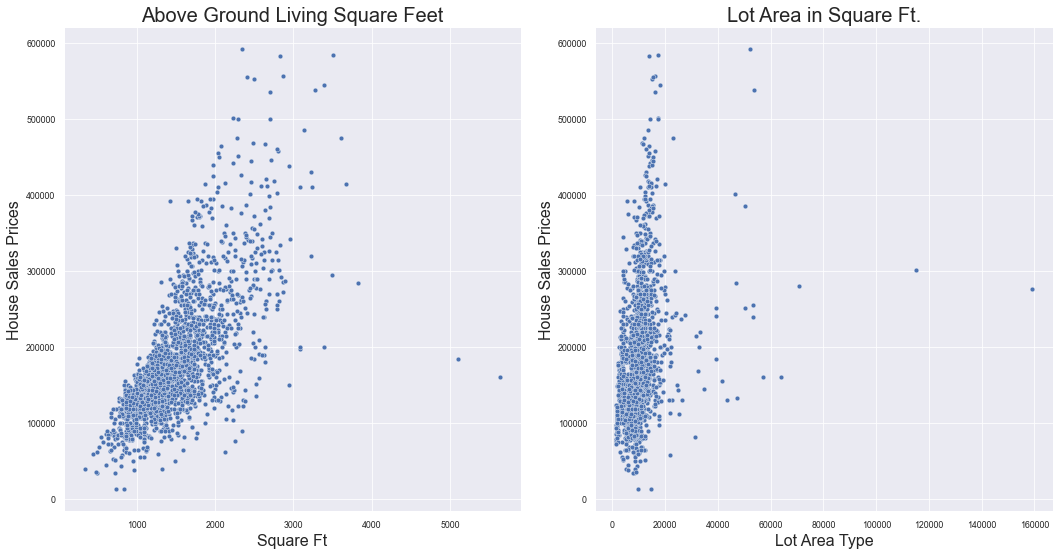

In [318]:
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":20,"axes.labelsize":16})   

fig = plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(121)
g=sns.scatterplot(x='gr_liv_area', y="saleprice",  data=df, ax=ax1) 
g.set(xlabel ='Square Ft' , ylabel='House Sales Prices', title = 'Above Ground Living Square Feet')

ax2 = fig.add_subplot(122)
g = sns.scatterplot(x="lot_area", y="saleprice", data=df, ax=ax2) 
g.set(xlabel ='Lot Area Type' , ylabel='House Sales Prices', title = 'Lot Area in Square Ft.')

plt.tight_layout();

Similarly to the sales price, there are a number of outliers in these two features as well. 

In [319]:
display(df.loc[df['lot_area'] > 100000])
df.drop(df[df['lot_area'] > 100000].index, axis = 0, inplace = True)

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_exposure,bsmt_full_bath,bsmt_half_bath,...,sale_type,saleprice,screen_porch,street,totrms_abvgrd,total_bsmt_sf,wood_deck_sf,year_built,year_remod/add,yr_sold
Id,,,,,,,,,,,,,,,,,,,,,
2116,1444,700,0,NaN,4,1Fam,TA,Gd,0.0,1.0,...,WD,277000,0,Pave,7,1444.0,0,1958,2006,2007
2072,1824,0,0,NaN,2,1Fam,TA,Gd,1.0,0.0,...,WD,302000,0,Pave,5,1643.0,380,1971,2002,2007


In [320]:
display(df.loc[df['gr_liv_area'] > 4000])
df.drop(df[df['gr_liv_area'] > 4000].index, axis = 0, inplace = True)


,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_exposure,bsmt_full_bath,bsmt_half_bath,...,sale_type,saleprice,screen_porch,street,totrms_abvgrd,total_bsmt_sf,wood_deck_sf,year_built,year_remod/add,yr_sold
Id,,,,,,,,,,,,,,,,,,,,,
1499,4692,950,0,NaN,3,1Fam,TA,Gd,2.0,0.0,...,New,160000,0,Pave,12,6110.0,214,2008,2008,2008
2181,5095,0,0,NaN,2,1Fam,TA,Gd,1.0,1.0,...,New,183850,0,Pave,15,5095.0,546,2008,2009,2007


# Feature Engineering

In this section, we will turn the remaining features into numerical data types so that they can be processed by our model. 

First, we will look at the sales price data.
To helo lower our model's bias, we will transform the sales price data by taking it's natural log. This not only brings the data down into the same range as our features, it also helps normalize its distribution. 

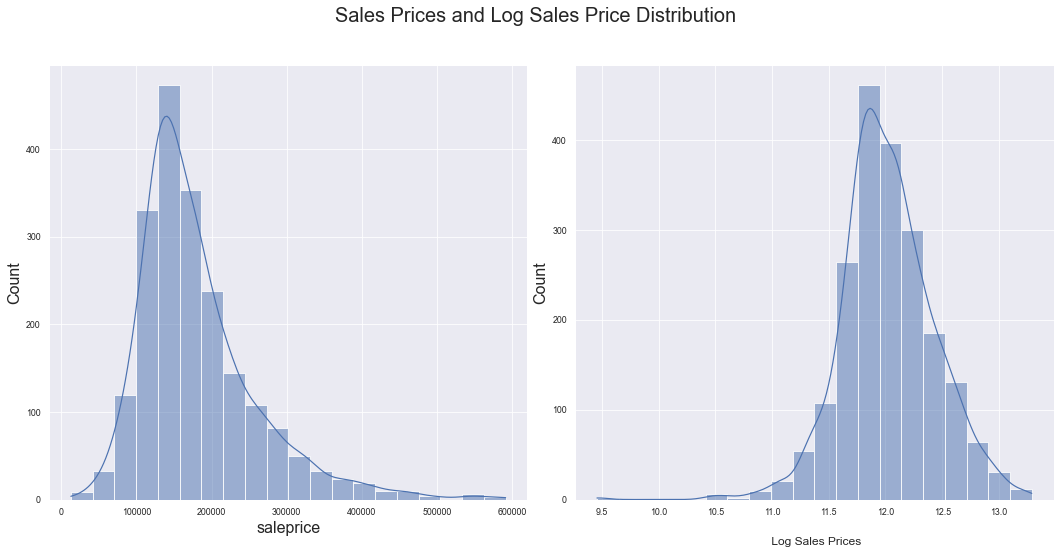

In [321]:
df['log_saleprice'] = np.log(df['saleprice'])

fig, ax = plt.subplots(1, 2, figsize = (18, 8))
fig.suptitle('Sales Prices and Log Sales Price Distribution', fontsize = 20,)
fig.subplots_adjust(wspace = 0.1, hspace = 0.1)

ax1 = sns.histplot(df['saleprice'], kde= True, bins = 20, ax = ax[0])
plt.xlabel('Sales Prices', fontsize = 16, labelpad = 20)

ax2 = sns.histplot(df['log_saleprice'], kde= True, bins = 20)
plt.xlabel(' Log Sales Prices', fontsize = 12);

### One-Hot Encoding

In this section, we will turn binary and nominal categories into 1's and 0's, and rank ordinal values from 1-5 based on quality ranking.  

In [322]:
#Replacing the remaining missing values as 0
for col in df:
    df[col] = df[col].replace(np.nan, '0')
    
#Replacing all rated scales in the data to 1-4
df = df.replace({'Ex':5,'Gd': 4, 'TA':3, 'Fa':2,'Po':1})

#Updating the dtypes for each column, so we can automate dummification on the nominal features. 
for i in df:
    try: 
        df[i] = df[i].astype(float)
    except:
        pass
    
#The following features require manual examiniation and mapping

#Turning Central Air into a binary
df['central_air']= df['central_air'].map({'Y': 1, 'N': 0})

#Mapping the street entrance type
df['street']= df['street'].map({'Grvl': 0, 'Pave': 1})

#mapping the driveway type
df['paved_drive']= df['paved_drive'].map({'N': 0,'P': 1, 'Y': 2})

#mapping basement finishes:
df['bsmtfin_type_1']= df['bsmtfin_type_1'].map({'0': 0, 'Unf': 1,'LwQ': 2, 'BLQ': 3, 'GLQ': 5, 'ALQ': 4, 'Rec':4})
df['bsmtfin_type_2']= df['bsmtfin_type_2'].map({'0': 0, 'Unf': 1,'LwQ': 2, 'BLQ': 3, 'GLQ': 5, 'ALQ': 4, 'Rec':4})

#note that we are categorizing the average rec room into the same as average living quarters. 

#the rest of the object columns are dummified
dummy_vars_list = df.select_dtypes(include = 'object')
dummy_vars = pd.get_dummies(data = dummy_vars_list, 
                            drop_first = True, dtype = int )

#removing the dummied columns from the df:
dropped = df.select_dtypes(include = 'object')
for i in dropped:
    df.drop(i, axis = 1, inplace = True)

dummy_vars['log_saleprice'] = df['log_saleprice']    

## Feature Interactions

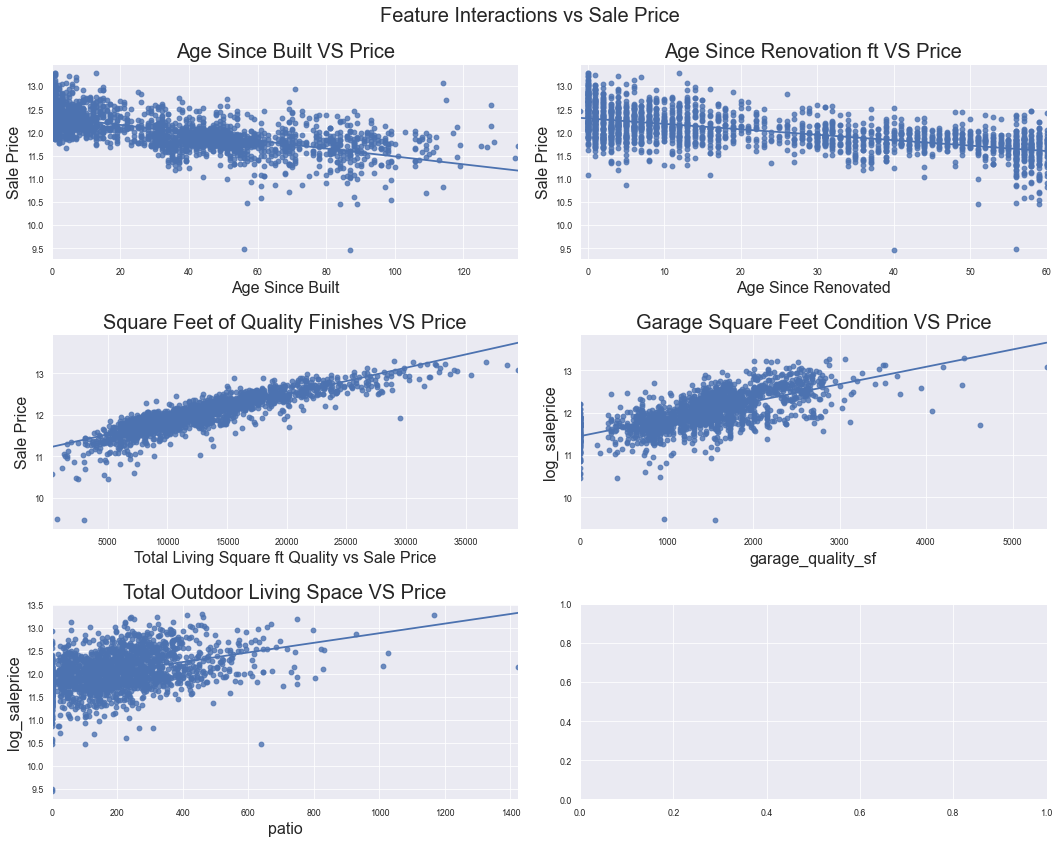

In [323]:
fig, ax = plt.subplots(3, 2, figsize = (15, 12) )   
fig.suptitle('Feature Interactions vs Sale Price', fontsize = 20,)
fig.subplots_adjust(wspace = 0.3, hspace = 0.3)

#The age of the home since being built will factor into the price, as well as the year it was remodeled. 
#We will create two new variables to help showcase the interaction of these factors with the sales price in the model. 
df['age_since_built'] = df['yr_sold'] - df['year_built']
ax = plt.subplot(321)
ax = sns.regplot(x= df['age_since_built'], y =df['log_saleprice'], ci=None)
ax.set(xlabel = 'Age Since Built', ylabel = 'Sale Price')
plt.title("Age Since Built VS Price")

df['age_since_renovated'] = df['yr_sold'] - df['year_remod/add']
ax = plt.subplot(322)
ax = sns.regplot(x= df['age_since_renovated'], y =df['log_saleprice'], ci=None)
ax.set(xlabel = 'Age Since Renovated', ylabel = 'Sale Price')

plt.title("Age Since Renovation ft VS Price")

#Multiply the total square footage by the overall quality, as these two combined would make the most impact. 
df['total_living_sf_quality'] = (df['gr_liv_area'] * df['overall_qual']) + (df['total_bsmt_sf'] * df['bsmt_cond'])
ax = plt.subplot(323)
ax = sns.regplot(x= df['total_living_sf_quality'], y =df['log_saleprice'], ci=None)
ax.set(xlabel = 'Total Living Square ft Quality vs Sale Price', ylabel = 'Sale Price')

plt.title("Square Feet of Quality Finishes VS Price")

#garage condition per square foot. Since Garage quality is of a higher correlation that condition, 
#let's try combining it with the square footage of the garage to see if this improves our model 
df['garage_quality_sf'] = df['garage_area'] * df['garage_qual']
ax = plt.subplot(324)
ax = sns.regplot(x= df['garage_quality_sf'], y =df['log_saleprice'], ci=None)
plt.title("Garage Square Feet Condition VS Price")

#Another consideration is adding all the patio options together to improve their combined weight in the model.
df['patio'] = df['wood_deck_sf'] + df['screen_porch'] + df['3ssn_porch']+ df['enclosed_porch'] + df['open_porch_sf']
ax = plt.subplot(325)
ax = sns.regplot(x= df['patio'], y =df['log_saleprice'], ci=None)
plt.title("Total Outdoor Living Space VS Price")

plt.tight_layout();

To completely capture the value of a home in a particular neighbourhood, we are mutiplying the neighbourhood by the new feature *total living square foot quality*. it is believed that the true value of a home comes from the amount of quality living space, and that value can be magnified by being in a particular neighborhood. 

In [324]:
neighbourhoods = ['neighborhood_Blueste',
       'neighborhood_BrDale', 'neighborhood_BrkSide',
       'neighborhood_ClearCr', 'neighborhood_CollgCr',
       'neighborhood_Crawfor', 'neighborhood_Edwards',
       'neighborhood_Gilbert', 'neighborhood_Greens',
       'neighborhood_GrnHill', 'neighborhood_IDOTRR',
       'neighborhood_Landmrk', 'neighborhood_MeadowV',
       'neighborhood_Mitchel', 'neighborhood_NAmes',
       'neighborhood_NPkVill', 'neighborhood_NWAmes',
       'neighborhood_NoRidge', 'neighborhood_NridgHt',
       'neighborhood_OldTown', 'neighborhood_SWISU',
       'neighborhood_Sawyer', 'neighborhood_SawyerW',
       'neighborhood_Somerst', 'neighborhood_StoneBr',
       'neighborhood_Timber', 'neighborhood_Veenker']
for i in neighbourhoods:
    dummy_vars[i] = dummy_vars[i] * df['total_living_sf_quality']

## Feature Selection

In [325]:
corr_matrix=df.corr()
corr_matrix.saleprice.sort_values(ascending=False)

saleprice                  1.000000
log_saleprice              0.946809
total_living_sf_quality    0.906352
overall_qual               0.805092
gr_liv_area                0.720249
exter_qual                 0.715117
kitchen_qual               0.694073
garage_quality_sf          0.665938
total_bsmt_sf              0.662898
garage_area                0.656145
garage_cars                0.649310
1st_flr_sf                 0.645499
bsmt_qual                  0.613543
year_built                 0.574329
year_remod/add             0.551304
fireplace_qu               0.540007
full_bath                  0.539785
totrms_abvgrd              0.507737
mas_vnr_area               0.505471
fireplaces                 0.470460
heating_qc                 0.461316
bsmtfin_sf_1               0.439530
patio                      0.414540
lot_area                   0.353019
open_porch_sf              0.340112
wood_deck_sf               0.331518
bsmtfin_type_1             0.327950
paved_drive                0

In [341]:
features = pd.DataFrame()
for col in df:
    if df[col].corr(df['log_saleprice']) > 0.47:
        features[col] = df[col]
    if df[col].corr(df['log_saleprice']) < -0.5:
        features[col] = df[col]
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 109 to 10
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   1st_flr_sf               2046 non-null   float64
 1   bsmt_qual                2046 non-null   float64
 2   exter_qual               2046 non-null   float64
 3   fireplace_qu             2046 non-null   float64
 4   fireplaces               2046 non-null   float64
 5   full_bath                2046 non-null   float64
 6   garage_area              2046 non-null   float64
 7   garage_cars              2046 non-null   float64
 8   gr_liv_area              2046 non-null   float64
 9   heating_qc               2046 non-null   float64
 10  kitchen_qual             2046 non-null   float64
 11  overall_qual             2046 non-null   float64
 12  saleprice                2046 non-null   float64
 13  totrms_abvgrd            2046 non-null   float64
 14  total_bsmt_sf           

In [342]:
corr_matrix = dummy_vars.corr()
corr_matrix.log_saleprice.sort_values(ascending=False)

log_saleprice           1.000000
foundation_PConc        0.550363
garage_type_Attchd      0.422732
garage_finish_Fin       0.418795
neighborhood_NridgHt    0.401559
                          ...   
ms_zoning_RM           -0.330664
foundation_CBlock      -0.333569
garage_type_Detchd     -0.399623
mas_vnr_type_None      -0.428257
garage_finish_Unf      -0.444784
Name: log_saleprice, Length: 162, dtype: float64

In [343]:
d_features = pd.DataFrame()
for col in dummy_vars:
    if dummy_vars[col].corr(dummy_vars['log_saleprice']) > 0.35:
        d_features[col] = dummy_vars[col]
    if dummy_vars[col].corr(dummy_vars['log_saleprice']) < - 0.35:
        d_features[col] = dummy_vars[col]

In [344]:
features = pd.concat([features, d_features], axis = 1 )
features.drop(['log_saleprice', 'saleprice' ], axis = 1, inplace = True)
features.columns

Index(['1st_flr_sf', 'bsmt_qual', 'exter_qual', 'fireplace_qu', 'fireplaces',
       'full_bath', 'garage_area', 'garage_cars', 'gr_liv_area', 'heating_qc',
       'kitchen_qual', 'overall_qual', 'totrms_abvgrd', 'total_bsmt_sf',
       'year_built', 'year_remod/add', 'age_since_built',
       'age_since_renovated', 'total_living_sf_quality', 'garage_quality_sf',
       'exterior_1st_VinylSd', 'exterior_2nd_VinylSd', 'foundation_PConc',
       'garage_finish_Fin', 'garage_finish_Unf', 'garage_type_Attchd',
       'garage_type_Detchd', 'mas_vnr_type_None', 'neighborhood_NridgHt'],
      dtype='object')

In [345]:
X = features
y = df['log_saleprice']

## Model Prep: Train - Test Split and Scaling

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

ss=StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

## Selecting and Fitting our Model

In [347]:
lasso_model = LassoCV(alphas = np.logspace(-3, 0, 100), cv = 15)
lasso_model = lasso_model.fit(X_train_sc, y_train)
print(f'The best alpha is {lasso_model.alpha_}')
print(f'The score with this model is {lasso_model.score(X_train_sc, y_train)}')
print(f'The test score is {lasso_model.score(X_test_sc, y_test)}')

The best alpha is 0.001
The score with this model is 0.8808411075786488
The test score is 0.8477044452722234


In [348]:
ridge_model = RidgeCV(alphas = np.logspace(0,5,300), cv = 5)
ridge_model = ridge_model.fit(X_train_sc, y_train)
print(f'The best alpha is {ridge_model.alpha_}')
print(f'The score with this model is {ridge_model.score(X_train_sc, y_train)}')

The best alpha is 31.99018284775064
The score with this model is 0.88087419863736


In [334]:
knn_params = {
    'n_neighbors': range(1, 51, 1),
    'metric': ['euclidean', 'manhattan']
    }
knn_gridsearch = GridSearchCV(KNeighborsRegressor(), knn_params, cv = 5, verbose = 1)
knn_gridsearch.fit(X_train_sc, y_train)
knn_model = knn_gridsearch.best_estimator_
print(f'The score with this model is {knn_model.score(X_train_sc, y_train)}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The score with this model is 0.8739099090042818


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    6.4s finished


In [349]:
rf = RandomForestRegressor()

rf_params = {
    'n_estimators' : [150, 200, 250],
    'max_depth' : [None, 3, 5],
    'min_samples_split': [2, 3, 4, 5],
}

gs = GridSearchCV(rf, param_grid= rf_params, cv = 5)

gs.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 3, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [150, 200, 250]})

In [350]:
rf_model = gs.best_estimator_
display(rf_model.score(X_train_sc, y_train))
display(rf_model.score(X_test_sc, y_test))
display(gs.best_params_)

0.9753101387824796

0.862897723386868

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

In [351]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor())
ada_params = {
    'n_estimators' : [50, 100],
    'base_estimator__min_samples_split': [2, 5, 10],
    'base_estimator__min_samples_leaf': [1, 3, 5]
}

gs = GridSearchCV(ada, ada_params, cv= 5)
gs.fit(X_train_sc, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor()),
             param_grid={'base_estimator__min_samples_leaf': [1, 3, 5],
                         'base_estimator__min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]})

In [352]:
ada_model = gs.best_estimator_
display(gs.best_params_)
display(ada_model.score(X_train_sc, y_train))
display(ada_model.score(X_test_sc, y_test))

{'base_estimator__min_samples_leaf': 3,
 'base_estimator__min_samples_split': 10,
 'n_estimators': 100}

0.9924115054451176

0.8672179714105274

In [353]:
svm = SVR()
param = {
    'C': [1, 10, 0.1],
    'kernel': ['rbf', 'linear']
}
gs = GridSearchCV(svm, param_grid= param, cv = 5)
gs.fit(X_train_sc, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 0.1, 100], 'kernel': ['rbf', 'linear']})

In [354]:
svm_model = gs.best_estimator_
display(svm_model.score(X_train_sc, y_train))
display(svm_model.score(X_test_sc, y_test))
display(gs.best_params_)

0.8788736390768161

0.845676226604162

{'C': 1, 'kernel': 'linear'}

## Residuals Analysis

In [917]:
y_pred_lasso = lasso_model.predict(X_test_sc)

In [918]:
np.sqrt(mean_squared_error(y_test, y_pred_lasso))

0.1338904322110072

### Plotting the Residuals to check for normality 

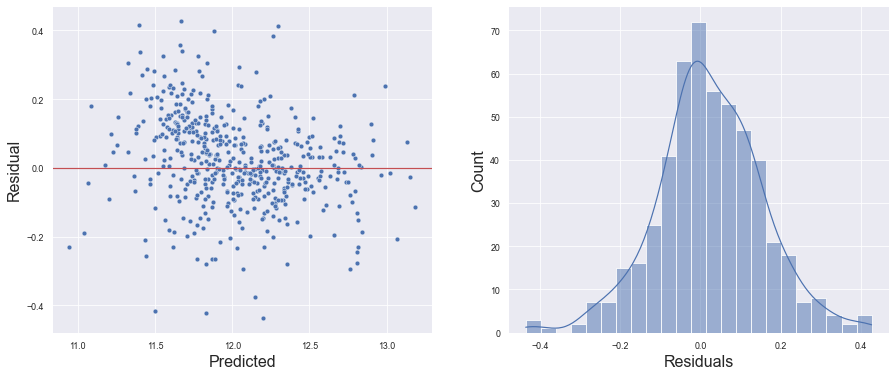

In [919]:
fig, ax = plt.subplots(3, 2, figsize = (15, 6) )   

ax = plt.subplot(121)
sns.scatterplot( x = y_pred_lasso, y = (y_test - y_pred_lasso))
ax.set(xlabel = 'Predicted', ylabel = 'Residual')
plt.axhline(0, color = 'r')

ax = plt.subplot(122)
sns.histplot(y_test - y_pred_lasso, kde = True)
ax.set(xlabel = 'Residuals');

# Predictions on Test Data Set

In [46]:
test = pd.read_csv('datasets/test.csv')

#Setting the ID's in the  as the dataframe index
test = test.set_index('Id')

#And organizing the columns in alphabetical order to expedite exploratory analysis.

test = test.reindex(sorted(test.columns), axis=1)

#Updating the column titles to make it easier to use going forward. 

for col in test.columns:
    test.rename(columns={col:col.lower().replace(" ","_")},inplace=True)

,1st_flr_sf,2nd_flr_sf,3ssn_porch,alley,bedroom_abvgr,bldg_type,bsmt_cond,bsmt_exposure,bsmt_full_bath,bsmt_half_bath,...,sale_type,screen_porch,street,totrms_abvgrd,total_bsmt_sf,utilities,wood_deck_sf,year_built,year_remod/add,yr_sold
Id,,,,,,,,,,,,,,,,,,,,,
2658,908,1020,0,Grvl,4,2fmCon,TA,No,0,0,...,WD,0,Pave,9,1020,AllPub,0,1910,1950,2006
2718,1967,0,0,NaN,6,Duplex,TA,No,0,0,...,WD,0,Pave,10,1967,AllPub,170,1977,1977,2006
2414,664,832,0,NaN,3,1Fam,Gd,Av,1,0,...,New,0,Pave,7,654,AllPub,100,2006,2006,2006
1989,968,0,0,NaN,2,1Fam,TA,No,0,0,...,WD,0,Pave,5,968,AllPub,0,1923,2006,2007
625,1394,0,0,NaN,3,1Fam,TA,No,1,0,...,WD,185,Pave,6,1394,AllPub,0,1963,1963,2009


Index(['1st_flr_sf', '2nd_flr_sf', '3ssn_porch', 'alley', 'bedroom_abvgr',
       'bldg_type', 'bsmt_cond', 'bsmt_exposure', 'bsmt_full_bath',
       'bsmt_half_bath', 'bsmt_qual', 'bsmt_unf_sf', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'bsmtfin_type_1', 'bsmtfin_type_2', 'central_air',
       'condition_1', 'condition_2', 'electrical', 'enclosed_porch',
       'exter_cond', 'exter_qual', 'exterior_1st', 'exterior_2nd', 'fence',
       'fireplace_qu', 'fireplaces', 'foundation', 'full_bath', 'functional',
       'garage_area', 'garage_cars', 'garage_cond', 'garage_finish',
       'garage_qual', 'garage_type', 'garage_yr_blt', 'gr_liv_area',
       'half_bath', 'heating', 'heating_qc', 'house_style', 'kitchen_abvgr',
       'kitchen_qual', 'land_contour', 'land_slope', 'lot_area', 'lot_config',
       'lot_frontage', 'lot_shape', 'low_qual_fin_sf', 'ms_subclass',
       'ms_zoning', 'mas_vnr_area', 'mas_vnr_type', 'misc_feature', 'misc_val',
       'mo_sold', 'neighborhood', 'open_porch_s

## Dropped Features in Test Data Set

In [47]:
#Like with the training data, we will drop the Utilities column from the test data to reduce noise.
test.drop('utilities', axis = 1, inplace = True)

#Simiarly with the land slope feature 
test.drop(columns = 'land_slope', inplace = True)

## Feature Engineering Test Data Set

In [48]:
#Replacing the remaining missing values as None
for col in test:
    test[col] = test[col].replace(np.nan, '0')
    
#Replacing all rated scales in the data to 1-4
test = test.replace({'Ex':5,'Gd': 4, 'TA':3, 'Fa':2,'Po':1})


#Updating the dtypes for each column, so we can automate dummification on the nominal features. 
for i in test:
    try: 
        test[i] = test[i].astype(float)
    except:
        pass
    
#The following features require manual mapping to capture their ordinal ranking

#Turning Central Air into a binary
test['central_air']= test['central_air'].map({'Y': 1, 'N': 0})

#Mapping the street entrance type
test['street']= test['street'].map({'Grvl': 0, 'Pave': 1})

#mapping the driveway type
test['paved_drive']= test['paved_drive'].map({'N': 0,'P': 1, 'Y': 2})

#mapping basement finishes:
test['bsmtfin_type_1']= test['bsmtfin_type_1'].map({'0': 0, 'Unf': 1,'LwQ': 2, 'BLQ': 3, 'GLQ': 5, 'ALQ': 4, 'Rec':4})
test['bsmtfin_type_2']= test['bsmtfin_type_2'].map({'0': 0, 'Unf': 1,'LwQ': 2, 'BLQ': 3, 'GLQ': 5, 'ALQ': 4, 'Rec':4})

#note that we are categorizing the average rec room into the same as average living quarters, like with the 
#training data set. 

#Dummying the remaining columns
test_dummy_vars_list = test.select_dtypes(include = 'object')
test_dummy_vars = pd.get_dummies(data = test_dummy_vars_list, drop_first = True, dtype = int )

#removing the dummied columns from the df:
dropped = test.select_dtypes(include = 'object')
for i in dropped:
    test.drop(i, axis = 1, inplace = True)

### Feature Interactions with the Test Data Set


In [51]:
#Age since the property was built
test['age_since_built'] = test['yr_sold'] - test['year_built']

test['age_since_renovated'] = test['yr_sold'] - test['year_remod/add']

#Multiply the total square footage by the overall quality, as these two combined would make the most impact. 
test['total_living_sf_quality'] = (test['gr_liv_area'] * test['overall_qual']) + (test['total_bsmt_sf'] * test['bsmt_cond'])


#garage condition per square foot. Since Garage quality is of a higher correlation that condition, 
#let's try combining it with the square footage of the garage to see if this improves our model 
test['garage_quality_sf'] = test['garage_area'] * test['garage_qual']

#Another consideration is adding all the patio options together to improve their combined weight in the model.
test['patio'] = test['wood_deck_sf'] + test['screen_porch'] + test['3ssn_porch']+ test['enclosed_porch'] + test['open_porch_sf']

#Fireplace quality and number of fireplaces per room
test['fireplace_interaction'] = test['fireplaces'] * test['fireplace_qu']


In [52]:
#Engineering the Neighborhood features like in the training data 
test_neighbourhoods = [
       'neighborhood_BrDale', 'neighborhood_BrkSide',
       'neighborhood_ClearCr', 'neighborhood_CollgCr',
       'neighborhood_Crawfor', 'neighborhood_Edwards',
       'neighborhood_Gilbert', 'neighborhood_Greens',
        'neighborhood_IDOTRR','neighborhood_Blueste',
       'neighborhood_MeadowV',
       'neighborhood_Mitchel', 'neighborhood_NAmes',
       'neighborhood_NPkVill', 'neighborhood_NWAmes',
       'neighborhood_NoRidge', 'neighborhood_NridgHt',
       'neighborhood_OldTown', 'neighborhood_SWISU',
       'neighborhood_Sawyer', 'neighborhood_SawyerW',
       'neighborhood_Somerst', 'neighborhood_StoneBr',
       'neighborhood_Timber', 'neighborhood_Veenker']
for i in test_neighbourhoods:
    test_dummy_vars[i] = test_dummy_vars[i] * test['total_living_sf_quality']

## Test Data Feature Selection

In [256]:
all_test_data = pd.concat([test, test_dummy_vars], axis = 1)
X_test_features = all_test_data[['1st_flr_sf', 'bsmt_qual', 'exter_qual', 'fireplace_qu',
       'fireplaces', 'full_bath', 'garage_area', 'garage_cars',
       'gr_liv_area', 'heating_qc', 'kitchen_qual', 'overall_qual',
       'totrms_abvgrd', 'total_bsmt_sf', 'year_built', 'year_remod/add',
       'age_since_built', 'age_since_renovated',
       'total_living_sf_quality', 'garage_quality_sf',
       'exterior_1st_VinylSd', 'exterior_2nd_VinylSd', 'foundation_PConc',
       'garage_finish_Fin', 'garage_finish_Unf', 'garage_type_Attchd',
       'mas_vnr_type_None', 'neighborhood_NridgHt']]

display(X_test_features.shape)
X_test_features.head()

(878, 28)

,1st_flr_sf,bsmt_qual,exter_qual,fireplace_qu,fireplaces,full_bath,garage_area,garage_cars,gr_liv_area,heating_qc,...,total_living_sf_quality,garage_quality_sf,exterior_1st_VinylSd,exterior_2nd_VinylSd,foundation_PConc,garage_finish_Fin,garage_finish_Unf,garage_type_Attchd,mas_vnr_type_None,neighborhood_NridgHt
Id,,,,,,,,,,,,,,,,,,,,,
2658,908.0,2.0,3.0,0.0,0.0,2.0,440.0,1.0,1928.0,4.0,...,14628.0,440.0,0,0,0,0,1,0,1,0.0
2718,1967.0,4.0,3.0,0.0,0.0,2.0,580.0,2.0,1967.0,3.0,...,15736.0,1740.0,0,0,0,1,0,1,1,0.0
2414,664.0,4.0,4.0,4.0,1.0,2.0,426.0,2.0,1496.0,5.0,...,13088.0,1278.0,1,1,1,0,0,1,1,0.0
1989,968.0,3.0,4.0,0.0,0.0,1.0,480.0,2.0,968.0,3.0,...,7744.0,960.0,0,0,0,0,1,0,1,0.0
625,1394.0,4.0,3.0,4.0,2.0,1.0,514.0,2.0,1394.0,4.0,...,12546.0,1542.0,0,0,0,0,0,1,0,0.0


In [57]:
X_test_features_sc = ss.fit_transform(X_test_features)

# Making and Exploring Predictions

In [310]:
model_df = pd.DataFrame(columns = ['Model', 'Training Score', 'Test Score'])

In [311]:
def make_and_save_pred(model, model_name, file_name):
    test_pred = pd.DataFrame()
    test_pred['ID'] = X_test_features.index
    test_pred = test_pred.set_index('ID')
    test_pred['SalePrice'] = model.predict(X_test_features_sc)
    test_pred['SalePrice'] = np.expm1(test_pred['SalePrice'])
    test_pred.to_csv(f'Predictions/{file_name}')
    model_df.loc[len(model_df)] =  [model_name, model.score(X_train_sc, y_train), model.score(X_test_sc, y_test)]
    return model_df

In [312]:
make_and_save_pred(ada_model,'Adaboost Decision Tree', 'ada model predictions')
make_and_save_pred(rf_model, 'Random Forest', 'random_forest_preds')
make_and_save_pred(lasso_model, 'Lasso Linear Regression', 'lasso_preds')
make_and_save_pred(ridge_model, 'Ridge Linear Regression', 'ridge preds')
make_and_save_pred(knn_model, 'K Nearest Neighbors', 'knn_model_preds')
make_and_save_pred(svm_model, 'SVM Regressor', 'svm_preds')

,Model,Training Score,Test Score
0,Adaboost Decision Tree,0.993133,0.825884
1,Random Forest,0.971051,0.837466
2,Lasso Linear Regression,0.879051,0.841299
3,Ridge Linear Regression,0.878619,0.839974
4,K Nearest Neighbors,0.882764,0.785077
5,SVM Regressor,0.876481,0.833238


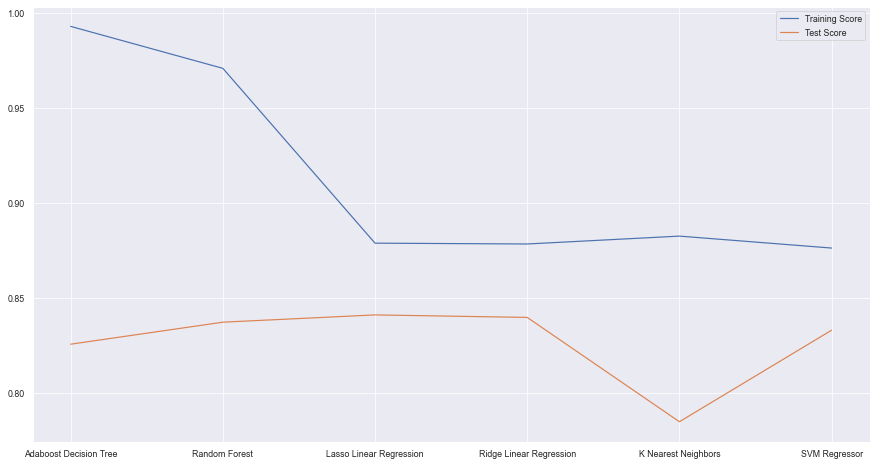

In [313]:
plt.figure(figsize = (15,8))

plt.plot(model_df['Model'], model_df['Training Score'], label = 'Training Score')
plt.plot(model_df['Model'], model_df['Test Score'], label = 'Test Score')
plt.legend();